# Telecom Churn Case Study

### Problem Statement:
* In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

* To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### Steps followed through out the case study:
* Importing necessary libraries
* Inspecting the Dataframe and deriving features
* Filtering high-value customers in the good phase basing on average recharge amount
* Tagging churners basing on below attributes and removing attributes of the churn phase
* Preprocessing Data
* Exploratory Data Analysis
* Predicting the churn using Principal Component Analysis
* Model Building
* Logistic Regression
* Decision Trees and hyper-parameter tuning
* Random Forests and hyper-parameter tuning
* Summary

### Importing necessary libraries

In [1]:
# importing necessary libraries
import pandas as pd, numpy as np

#importing below libraries to visualize data
import matplotlib.pyplot as plt 
import seaborn as sns

#to split data into train data and test data
from sklearn.model_selection import train_test_split

#to rescale features
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# The evaluation metrics of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# To suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
telecom_churn_data = pd.read_csv("telecom_churn_data.csv")
df = telecom_churn_data
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


## Understanding the Data Dictionary
`Please find details for all variables here `
[Data Dictionary](https://cdn.upgrad.com/UpGrad/temp/a625d1ee-b8d7-4edb-bdde-b1d82beaf5b4/Data+Dictionary-+Telecom+Churn+Case+Study.xlsx)

### Inspecting the Dataframe and deriving features

In [3]:
# Let's check the dimensions of the dataframe
df.shape

(99999, 226)

In [4]:
# Fetching columns with recharge information
recharge_columns =  df.columns[df.columns.str.contains('rech_amt|rech_data')]
print(recharge_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


In [5]:
# Fetching recharge information columns with null values and the missing percentage
df_na = (df.loc[:,recharge_columns].isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data

,Missing Ratio
av_rech_amt_data_6,74.846748
max_rech_data_6,74.846748
total_rech_data_6,74.846748
date_of_last_rech_data_6,74.846748
av_rech_amt_data_7,74.428744
max_rech_data_7,74.428744
total_rech_data_7,74.428744
date_of_last_rech_data_7,74.428744
av_rech_amt_data_9,74.077741
max_rech_data_9,74.077741


In [6]:
# About 74 % of total_rech_data_6, total_rech_data_7, total_rech_data_8, total_rech_data_9, av_rech_amt_data_6, av_rech_amt_data_7, av_rech_amt_data_8, av_rech_amt_data_9 are null values
# replacing null values with Zero
df['total_rech_data_6'] = df['total_rech_data_6'].replace(np.NaN,0.0)
df['total_rech_data_7'] = df['total_rech_data_7'].replace(np.NaN,0.0)
df['total_rech_data_8'] = df['total_rech_data_8'].replace(np.NaN,0.0)
df['total_rech_data_9'] = df['total_rech_data_9'].replace(np.NaN,0.0)

df['av_rech_amt_data_6'] = df['av_rech_amt_data_6'].replace(np.NaN,0.0)
df['av_rech_amt_data_7'] = df['av_rech_amt_data_7'].replace(np.NaN,0.0)
df['av_rech_amt_data_8'] = df['av_rech_amt_data_8'].replace(np.NaN,0.0)
df['av_rech_amt_data_9'] = df['av_rech_amt_data_9'].replace(np.NaN,0.0)

#### Deriving a new column total recharge amount for 6,7, 8 and 9 to get more insights

In [7]:
df['total_rech_amt_data_6'] = df.av_rech_amt_data_6 * df.total_rech_data_6
df['total_rech_amt_data_7'] = df.av_rech_amt_data_7 * df.total_rech_data_7
df['total_rech_amt_data_8'] = df.av_rech_amt_data_8 * df.total_rech_data_8
df['total_rech_amt_data_9'] = df.av_rech_amt_data_9 * df.total_rech_data_9

In [8]:
# Dropping all av_rech_amt_data_X and total_rech_data_X related columns 
df.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)

### Filtering high-value customers in the good phase basing on average recharge amount
#### Define high-value customers as follows:
- Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months 

In [9]:
# Calculating average recharge amount in good phase
df['av_rech_amt_6_7'] = (df.total_rech_amt_6 + df.total_rech_amt_data_6 \
                                               + df.total_rech_amt_7+ df.total_rech_amt_data_7)/2

In [10]:
#Calculating the 70th percentile
high_value_filter_6_7 = np.percentile(df.av_rech_amt_6_7, 70.0)

In [11]:
#Filtering the high value customers basing on the 70th percentile as per problem statement
telecom_HighValue_Cust = df[df.av_rech_amt_6_7 > high_value_filter_6_7]
telecom_HighValue_Cust.shape

(29953, 223)

### Tagging churners basing on below attributes and removing attributes of the churn phase:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [12]:
#Tagging churners
telecom_HighValue_Cust['churn'] = np.where(telecom_HighValue_Cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
telecom_HighValue_Cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,av_rech_amt_6_7,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,30.40,0.00,101.20,3.58,252.0,252.0,252.0,0.0,559.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,57.74,19.38,18.74,0.00,0.0,0.0,0.0,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,21.03,910.65,122.16,0.00,0.0,354.0,207.0,0.0,696.0,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,640.0,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,40.45,51.86,0.00,0.00,0.0,712.0,540.0,252.0,583.0,0


In [13]:
# Churn rate
telecom_HighValue_Cust['churn'].value_counts()/len(telecom_HighValue_Cust)*100

0    91.877274
1     8.122726
Name: churn, dtype: float64

In [14]:
# Changing data type of columns

object_col_data = telecom_HighValue_Cust.select_dtypes(include=['object'])
print(object_col_data.iloc[0])

# convert to datetime
for col in object_col_data.columns:
    telecom_HighValue_Cust[col] = pd.to_datetime(telecom_HighValue_Cust[col])

last_date_of_month_6        6/30/2014
last_date_of_month_7        7/31/2014
last_date_of_month_8        8/31/2014
last_date_of_month_9        9/30/2014
date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_9         9/28/2014
date_of_last_rech_data_6    6/21/2014
date_of_last_rech_data_7    7/16/2014
date_of_last_rech_data_8     8/8/2014
date_of_last_rech_data_9          NaN
Name: 0, dtype: object


In [15]:
# Dropping attributes of churn phase
drop_cols = [col for col in telecom_HighValue_Cust.columns if '_9' in col]
print(drop_cols)

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_rech_amt_data_9']


In [16]:
telecom_HighValue_Cust.drop(drop_cols, axis=1, inplace=True)

In [17]:
telecom_HighValue_Cust.shape

(29953, 171)

In [18]:
# Drop Columns with > 30% of missing values
cols = telecom_HighValue_Cust.columns
telecom_null_perc = telecom_HighValue_Cust.isnull().sum() * 100 / len(telecom_HighValue_Cust)
telecom_null_df = pd.DataFrame({'col_name': cols,
                                 'perc_null': telecom_null_perc})

drop_cols = telecom_null_df.loc[telecom_null_df["perc_null"] > 30.0]["col_name"]

# lets drop these columns
telecom_HighValue_Cust.drop(drop_cols, axis=1,inplace = True)
telecom_HighValue_Cust.shape

(29953, 147)

In [19]:
# Dropping highly correlated columns

cor = telecom_HighValue_Cust.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

monthly_3g_6      vol_3g_mb_6         0.601325
total_ic_mou_7    loc_ic_t2t_mou_7    0.601655
total_rech_amt_8  arpu_6              0.604021
roam_og_mou_8     roam_og_mou_7       0.605131
offnet_mou_8      offnet_mou_6        0.605156
                                        ...   
total_rech_amt_7  arpu_7              0.943571
total_rech_amt_6  arpu_6              0.946104
isd_og_mou_8      isd_og_mou_7        0.949809
                  isd_og_mou_6        0.950194
total_rech_amt_8  arpu_8              0.955322
Length: 206, dtype: float64

In [20]:
drop_column_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2f_mou_8',
                'loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
                 
telecom_HighValue_Cust.drop(drop_column_list, axis=1, inplace=True)

## Preprocessing Data

In [21]:
#Fetching columns with 1 unique value
col_list = telecom_HighValue_Cust.loc[:,telecom_HighValue_Cust.apply(pd.Series.nunique) == 1]
col_list.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,NaN,NaN,0.0,NaN,NaN,0.0
7,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0
8,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0
21,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0
23,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Removing columns with one unique value 
telecom_HighValue_Cust = telecom_HighValue_Cust.loc[:,telecom_HighValue_Cust.apply(pd.Series.nunique) != 1]
telecom_HighValue_Cust.shape

(29953, 94)

In [23]:
# Renaming columns
telecom_HighValue_Cust.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

## Exploratory Data Analysis

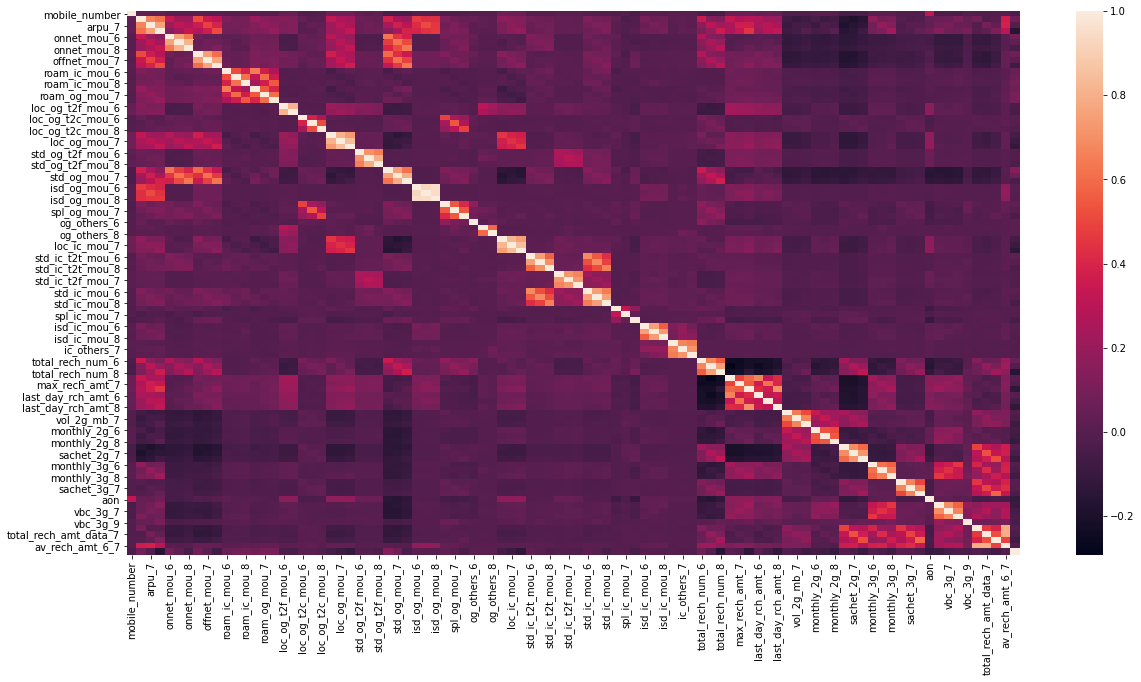

In [24]:
#finding the correlation matrix between numeric variables using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(telecom_HighValue_Cust.corr())
plt.show()

In [25]:
# Conevrt AON in Months

telecom_HighValue_Cust['aon_mon'] = telecom_HighValue_Cust['aon']/30
telecom_HighValue_Cust.drop('aon', axis=1, inplace=True)
telecom_HighValue_Cust['aon_mon'].head()

0     32.266667
7     26.733333
8     10.500000
21    24.000000
23    20.133333
Name: aon_mon, dtype: float64

Text(0.5, 1.0, 'Customers by their tenure')

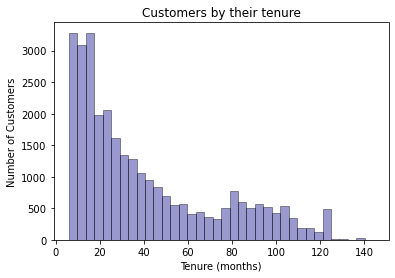

In [26]:
ax = sns.distplot(telecom_HighValue_Cust['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Customers by their tenure')

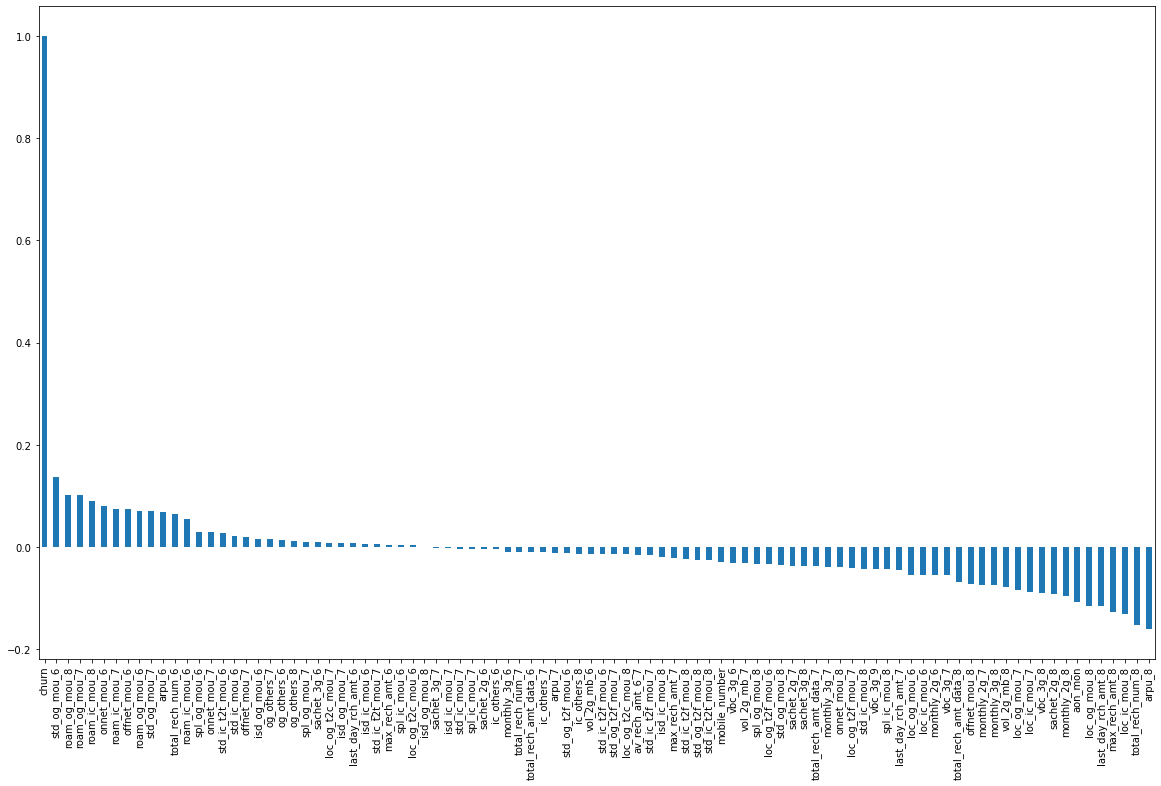

In [27]:
# Corelation of churn 

plt.figure(figsize=(20,12))
telecom_HighValue_Cust.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

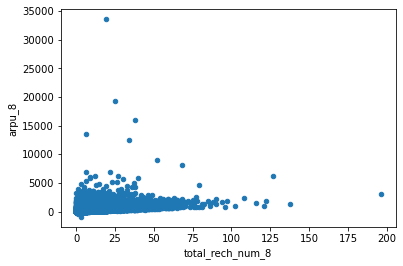

In [28]:
# Relation between Total recharge in 8th month Vs Average revenue in 8th month

telecom_HighValue_Cust[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')

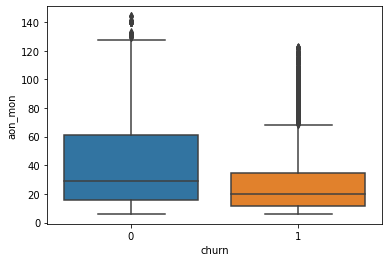

In [29]:
# Relation between churn and Tenure

sns.boxplot(x = telecom_HighValue_Cust.churn, y = telecom_HighValue_Cust.aon_mon)

Customers who do not churn tend to stay for longer tenure 

In [30]:
# Creating new dataframe for model

df = telecom_HighValue_Cust[:].copy()

# Dropping mobile_number
df.drop('mobile_number', axis=1, inplace=True)

# Since all values are realted to Price/ Cost/ Amount, Filling NaN with 0

df.fillna(0, inplace=True)

In [31]:
X = df.drop(['churn'], axis=1)
y = df['churn']

df.drop('churn', axis=1, inplace=True)

In [32]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=100,stratify = y)

### Splitting the data using *stratify* parameter to make sure the class variables are equally distributed among the train and test splits thereby handling class imbalance

In [34]:
y_train.value_counts()/len(y_train)*100

0    91.877713
1     8.122287
Name: churn, dtype: float64

In [35]:
y_test.value_counts()/len(y_test)*100

0    91.876252
1     8.123748
Name: churn, dtype: float64

### Predicting the churn using Principal Component Analysis

In [36]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=100)

In [37]:
X_train_pca = pca.fit_transform(X_train)
print(X_train_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(20967, 92)
(8986, 92)


### Applying logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)

# Predicted probabilities
y_pred = lr_pca.predict(X_test_pca)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[8156  100]
 [ 529  201]]


In [40]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred))

Logistic Regression accuracy with PCA:  0.9300022256843979


In [41]:
col = list(df.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})

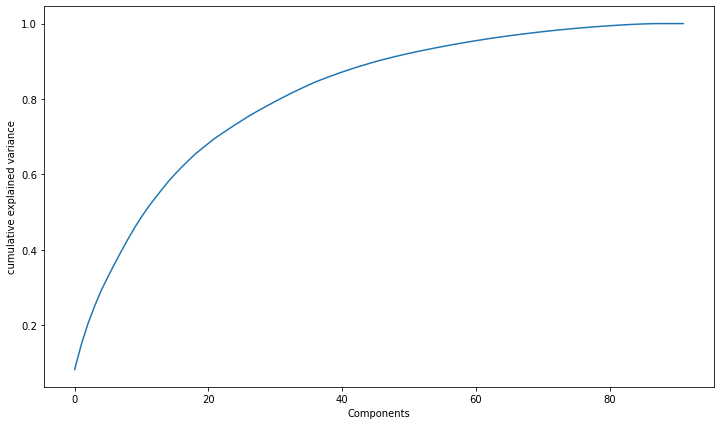

In [42]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('cumulative explained variance')
plt.show()

In [43]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([  8.2 ,  14.84,  20.4 ,  25.08,  29.29,  32.89,  36.32,  39.68,
        42.89,  45.93,  48.71,  51.29,  53.62,  55.88,  58.08,  60.05,
        61.9 ,  63.63,  65.34,  66.8 ,  68.22,  69.6 ,  70.82,  72.  ,
        73.16,  74.29,  75.4 ,  76.45,  77.43,  78.4 ,  79.35,  80.28,
        81.18,  82.05,  82.9 ,  83.72,  84.51,  85.2 ,  85.88,  86.53,
        87.15,  87.75,  88.33,  88.87,  89.4 ,  89.92,  90.39,  90.84,
        91.28,  91.7 ,  92.1 ,  92.49,  92.86,  93.22,  93.57,  93.91,
        94.25,  94.57,  94.88,  95.18,  95.47,  95.75,  96.03,  96.29,
        96.54,  96.78,  97.01,  97.23,  97.45,  97.66,  97.87,  98.06,
        98.25,  98.43,  98.6 ,  98.76,  98.92,  99.06,  99.2 ,  99.33,
        99.45,  99.56,  99.67,  99.77,  99.85,  99.93,  99.99, 100.02,
       100.02, 100.02, 100.02, 100.02])

```47 components explain 90% variance```

```60 components explain 95% variance```


In [44]:
# Applying LR with 90% variance

pca_90 = PCA(0.9)

df_tr_pca_90 = pca_90.fit_transform(X_train)
print(df_tr_pca_90.shape)

df_test_pca_90 = pca_90.transform(X_test)
print(df_test_pca_90.shape)

(20967, 47)
(8986, 47)


In [45]:
# Running the model using selected variables

lr_pca1 = LogisticRegression()
lr_pca1.fit(df_tr_pca_90, y_train)

# Predicted probabilities
y_pred90 = lr_pca1.predict(df_test_pca_90)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred90)

In [46]:
print(confusion_matrix(y_test,y_pred90))

[[8146  110]
 [ 563  167]]


In [47]:
print("Logistic Regression accuracy with PCA = ",accuracy_score(y_test,y_pred90))

Logistic Regression accuracy with PCA =  0.9251057200089028


## Model Building

In [48]:
# Feature reduction using RFE
lr = LogisticRegression()

# running RFE with 15 variables as output
rfe = RFE(lr, 15)   
rfe = rfe.fit(X_train, y_train)

In [49]:
rfe_features = list(df.columns[rfe.support_])
print("Features identified using RFE ", rfe_features)

Features identified using RFE  ['arpu_6', 'loc_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'vbc_3g_9', 'total_rech_amt_data_8']


In [50]:
X_rfe = pd.DataFrame(data=X_train).iloc[:, rfe.support_]
y_rfe = y_train

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_rfe, y_rfe)

LogisticRegression()

In [52]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8196   60]
 [ 578  152]]


In [53]:
print('Accuracy of Logistic Regression Model: ',lr.score(X_test_rfe, y_test))

Accuracy of Logistic Regression Model:  0.9290006677053194


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8256
           1       0.72      0.21      0.32       730

    accuracy                           0.93      8986
   macro avg       0.83      0.60      0.64      8986
weighted avg       0.92      0.93      0.91      8986



In [55]:
# To get the weights of all the variables
weights = pd.Series(lr.coef_[0],
                 index=rfe_features)
weights.sort_values(ascending = False)

loc_ic_mou_7             0.760537
arpu_6                   0.359198
total_rech_amt_data_8    0.330455
sachet_3g_8             -0.276852
vol_2g_mb_8             -0.311542
std_ic_mou_8            -0.370569
spl_ic_mou_8            -0.386968
monthly_2g_8            -0.597935
total_rech_num_8        -0.627550
last_day_rch_amt_8      -0.629904
sachet_2g_8             -0.631821
monthly_3g_8            -0.645933
loc_og_mou_8            -0.734082
vbc_3g_9                -1.129393
loc_ic_mou_8            -2.800653
dtype: float64

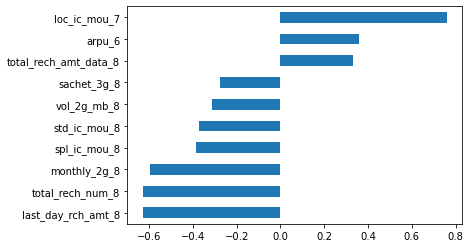

In [56]:
weights.sort_values()[-10:].plot(kind = 'barh')

### Model accuracy is 93%

### Decision Trees

In [57]:
# Feature selection using LASSO

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
linsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(linsvc, prefit=True)
X_lasso = model.transform(X_train)
pos = model.get_support(indices=True)

# Feature reduction using RFE
print(X_lasso.shape)
print(pos)

(20967, 20)
[ 0  2  8  9 13 14 22 26 40 52 59 61 64 67 70 72 73 76 83 91]


In [58]:
#feature vector for decision tree
lasso_features = list(df.columns[pos])
print("Features for LASSO model buidling: ", lasso_features)

Features for LASSO model buidling:  ['arpu_6', 'arpu_8', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_6', 'loc_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_6', 'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8', 'vbc_3g_8', 'aon_mon']


In [59]:
# Fitting the decision tree with default hyperparameters
# max_depth = 5 (so that we can plot and read the tree)
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_lasso, y_train)

DecisionTreeClassifier(max_depth=5)

In [60]:
# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred1 = dtc.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8256
           1       0.70      0.55      0.62       730

    accuracy                           0.94      8986
   macro avg       0.83      0.76      0.79      8986
weighted avg       0.94      0.94      0.94      8986



In [61]:
# Printing confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred1))
print('Accuracy of Decision Tree =',accuracy_score(y_test,y_pred1))

[[8082  174]
 [ 328  402]]
Accuracy of Decision Tree = 0.9441353216113955


#### Hyperparameter tuning

In [62]:
# GridSearchCV to find optimal max_depth

# Number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dt = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_lasso, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [63]:
# scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.057152,0.006225,0.000000,0.000000,1,{'max_depth': 1},0.928469,0.926085,0.922251,0.935845,...,0.928078,0.004439,10,0.928039,0.928635,0.929593,0.926195,0.928282,0.928149,0.001111
1,0.106444,0.011393,0.002664,0.002626,2,{'max_depth': 2},0.937053,0.938722,0.935130,0.945385,...,0.939333,0.003492,4,0.939486,0.940500,0.941397,0.938834,0.940026,0.940049,0.000874
2,0.149660,0.005566,0.000733,0.001040,3,{'max_depth': 3},0.937053,0.938722,0.935130,0.945385,...,0.939333,0.003492,4,0.939486,0.940500,0.942053,0.938834,0.940026,0.940180,0.001089
3,0.177062,0.008069,0.003333,0.006180,4,{'max_depth': 4},0.939914,0.940153,0.937276,0.945862,...,0.941241,0.002936,1,0.941871,0.942348,0.943961,0.941934,0.942590,0.942541,0.000758
4,0.222543,0.005075,0.001813,0.003151,5,{'max_depth': 5},0.939437,0.942537,0.937515,0.943954,...,0.941146,0.002333,2,0.944256,0.943540,0.944676,0.943186,0.943484,0.943828,0.000551


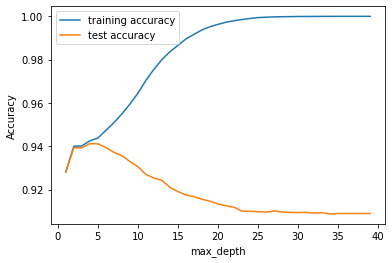

In [64]:
# plotting accuracies with max_depth

plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

max depth = 5 seems to be optimal

In [65]:
# Tuning min sample leaf
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_lasso, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [66]:
# scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.674550,0.028326,0.003371,0.006741,5,{'min_samples_leaf': 5},0.924416,0.918932,0.921774,0.927021,...,0.923022,0.002692,10,0.967150,0.967627,0.967271,0.966198,0.966019,0.966853,0.000630
1,0.518172,0.023208,0.009427,0.007698,25,{'min_samples_leaf': 25},0.937053,0.938245,0.932745,0.943954,...,0.937616,0.003659,9,0.947415,0.946939,0.948134,0.945988,0.947299,0.947155,0.000701
2,0.468165,0.015317,0.012995,0.006521,45,{'min_samples_leaf': 45},0.940868,0.938960,0.935130,0.942285,...,0.939142,0.002426,8,0.943779,0.943838,0.944557,0.942947,0.944915,0.944007,0.000683
3,0.443869,0.029317,0.000000,0.000000,65,{'min_samples_leaf': 65},0.941106,0.940629,0.937038,0.944670,...,0.940764,0.002426,4,0.943481,0.942944,0.944021,0.941994,0.943245,0.943137,0.000672
4,0.492349,0.045604,0.005579,0.005918,85,{'min_samples_leaf': 85},0.940153,0.940153,0.936322,0.945385,...,0.940144,0.002971,5,0.942169,0.942229,0.943245,0.941099,0.943245,0.942398,0.000801


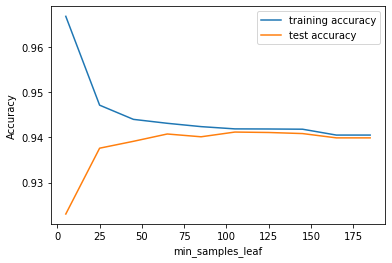

In [67]:
# plotting accuracies with min_samples_leaf

plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_samples_leaf = 25 seems to be optimal

In [68]:
# Tuning min_sample_split

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_lasso, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [69]:
# Scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.743099,0.033220,0.002843,0.005131,5,{'min_samples_split': 5},0.913448,0.913686,0.907465,0.912473,...,0.912004,0.002308,10,0.990938,0.991832,0.991296,0.990581,0.990163,0.990962,0.000575
1,0.736406,0.035225,0.005735,0.007043,25,{'min_samples_split': 25},0.927754,0.924893,0.922251,0.927975,...,0.927028,0.003354,9,0.966971,0.967388,0.965840,0.965542,0.966138,0.966376,0.000695
2,0.730591,0.030071,0.005541,0.007023,45,{'min_samples_split': 45},0.930138,0.927277,0.928214,0.931076,...,0.929508,0.001502,8,0.958982,0.958982,0.958865,0.955765,0.958686,0.958256,0.001250
3,0.721574,0.032563,0.003009,0.006018,65,{'min_samples_split': 65},0.934192,0.931807,0.932268,0.932268,...,0.932274,0.001092,7,0.953974,0.954928,0.954394,0.952426,0.954751,0.954095,0.000896
4,0.763056,0.058219,0.000200,0.000400,85,{'min_samples_split': 85},0.932046,0.934907,0.931314,0.937515,...,0.933753,0.002233,6,0.951231,0.951291,0.952188,0.949922,0.953082,0.951543,0.001056


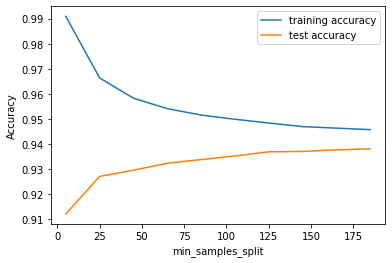

In [70]:
# plotting accuracies with min_samples_leaf

plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_samples_split = 100 seems to be optimal

In [71]:
# Creating parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_lasso, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   41.8s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 175, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [72]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)

Best Accuracy 0.9414795260761715


In [73]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=25,
                       min_samples_split=100)


In [74]:
# model with optimal hyperparameters
dt_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth = 5, 
                                  min_samples_leaf = 25,
                                  min_samples_split=100)
dt_gini.fit(X_lasso, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=25, min_samples_split=100,
                       random_state=100)

In [75]:
# accuracy score
print ('Accuracy Score for Decision Tree Final Model = ',dt_gini.score(X_test,y_test))

Accuracy Score for Decision Tree Final Model =  0.9442466058312932


### Model accuracy is 94%

## Random Forests

In [76]:
# random forests with default hyperparameters

rf = RandomForestClassifier()
rf.fit(X_lasso, y_train)

# Make predictions
prediction_test = rf.predict(X_test)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.9455820164700646


In [77]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8256
           1       0.74      0.50      0.60       730

    accuracy                           0.95      8986
   macro avg       0.85      0.74      0.79      8986
weighted avg       0.94      0.95      0.94      8986



In [78]:
# Printing confusion matrix
print(confusion_matrix(y_test, prediction_test))

[[8130  126]
 [ 363  367]]


In [79]:
# Hyperparameter tuning

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_lasso, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [80]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.818430,0.020104,0.062286,0.003793,2,{'max_depth': 2},0.937768,0.938960,0.934415,0.941092,...,0.938332,0.002230,4,0.939009,0.938830,0.940026,0.938059,0.938297,0.938844,0.000684
1,4.517098,0.037672,0.094050,0.003330,7,{'max_depth': 7},0.942299,0.941345,0.937515,0.946339,...,0.942147,0.002860,2,0.947356,0.947833,0.948492,0.946942,0.947836,0.947692,0.000521
2,6.788765,0.143959,0.130442,0.005920,12,{'max_depth': 12},0.943968,0.943491,0.937992,0.944908,...,0.942242,0.002515,1,0.970906,0.970429,0.971742,0.970430,0.971682,0.971038,0.000578
3,8.626876,0.502887,0.171200,0.022276,17,{'max_depth': 17},0.940629,0.942060,0.938230,0.946101,...,0.941336,0.002690,3,0.992011,0.992786,0.993800,0.992786,0.992011,0.992679,0.000659


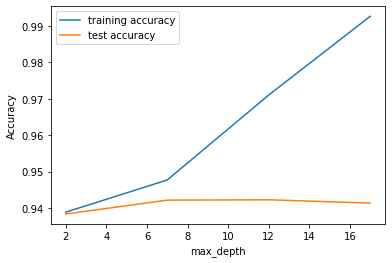

In [81]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [82]:
# tuning min_sample_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_lasso, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(50, 400, 10)},
             return_train_score=True, scoring='accuracy')

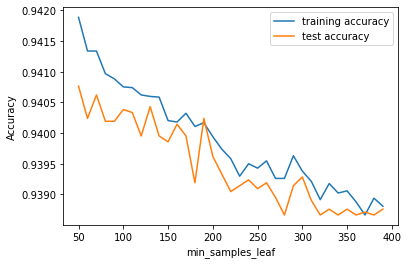

In [83]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

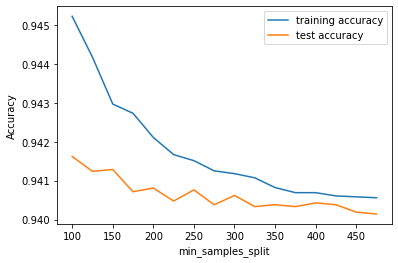

In [84]:
# tuning min_sample_split

n_folds = 5
parameters = {'min_samples_split': range(100, 500, 25)}
rf = RandomForestClassifier()

rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_lasso, y_train)

# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [85]:
# Grid search to find optimal hyperparameters

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [500,700], 
    'max_features': [10,20,25]
}
# Creating a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8305
           1       0.78      0.40      0.53       681

    accuracy                           0.95      8986
   macro avg       0.87      0.69      0.75      8986
weighted avg       0.94      0.95      0.94      8986

[[8230   75]
 [ 411  270]]


In [88]:
# Accuracy score
print ('Accuracy Score for Random Forest Final Model = ',accuracy_score(y_test, prediction_test))

Accuracy Score for Random Forest Final Model =  0.9459158691297574


### Model accuracy ~ 94%

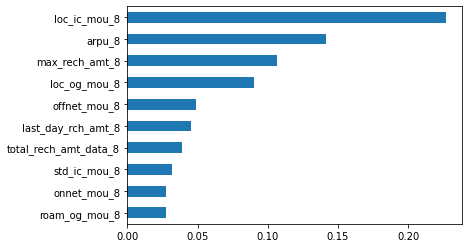

In [89]:
X = df
# Scaling all the variables to a range of 0 to 1
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

## Summary Result:

* After modeling Logistic Regression with PCA we achieved around 92% accuracy in the predictions. 

* After analysing and evaluating we found 8 month's can be the base of Churn Analysis

* Decision Tree/Random forests are the best methods to found significant features, however other models are also showing similar results.

* Local Calls, Incoming calls and minutes of usage in the action phase needs to be monitored to avoid customer churn

* Average revenue per customer and Max Recharge Amount are also potential Churn Indicators

* Outgoing calls and All kind of calls outside the operator T network are good indicators of churn

